# Exploring Asymmetries in Frequencies of Gendered Ngrams

## UPDATE:
- I added a plot that shows the proportion of gendered terms. I just divide them by the frequency of the role noun in isolation. For example, I find all occurrences of 'cheerleader' as a unigram noun in syntactic ngram and divide that by the sum of all gendered occurrences. 

- I stated including ngrams with man/woman and females/males not just men/women and female/male

- I lemmatized ngrams so I could combine counts for ngrams with the same lemmatized form. 

### File Attribution
Study2A_designations_1of2.csv & Study2A_designations_2of2.csv are from [Bailey et al. (2022)](https://www.science.org/doi/10.1126/sciadv.abm2463). Role noun perceived frequencies are from [Misersky, et al. (2013)](https://link.springer.com/article/10.3758/s13428-013-0409-z)

### Principles I was thinking of 
1. **Adjectives for traits/features/attributes/etc.** These adjectives will co-occur more frequently with words for men if they are traits that are stereotypically associated with men and will co-occur more frequently with words for women if they are stereotypically associated with women. If they do not have a stereotypical association than they will co-occur more frequently with words for men because of the person=male bias discussed in the literature. Men are discussed more frequently and tend to have a closer association with traits used to describe humans than women 
    - this paper provides a list of adjectives annotated with gender stereotypes: 

2. **Identity adjectives (ethnicity, nationality, religion):** These adjectives will co-occur more frequently with words for women than they do with men. This is because men are perceived as the typical/default human and thus women are the ones who are noted more frequently in language. 
    - The caveat for this is I'm not sure where adjectives describing sexuality fit into this. 

3. **Role (or 'Human-centric') nouns:** When gender modified a role nouns the following pattern might be observed. When there are no (or a very low percentage of women) in a given role noun then words men will more frequently modify these nouns than words for women. When there is a lower percentage of women associated with a certain role noun or an equal percentage of men and women then words for women will co-occur more frequently. When there is a higher percentage of women, than words for men will co-occur more frequently. Finally, perhaps if there are almost no women associated with a role noun then words for men will again co-occur more frequently. 
    - The term role noun comes from [this paper](https://link.springer.com/article/10.3758/s13428-013-0409-z) you sent and I think it captures what I was trying to describe by the phrase human-centric nouns. 


4. \*\***Body Parts:** a very specific principle but I've noticed in the data that it seems body parts co-occur more frequently with words for men than women (could be from the person=male bias)


### Lea's Principles (Or my understanding of them)
1. **Sociosemantic adjectives:** Adjectives in different sociosemantic classes (i.e. relationships/sexuality, status, physical characteristics, behavioural characteristics) will co-occur more frequently with men/women based on stereotypical associations. For example, adjectives associated with positive physical appearance co-occur more frequently with words for women and traits associated with high status will co-occur more frequently with words for men. 

2. **Valence, Arousal, Dominance:** Women dominated modifiers are lower in dominance and higher in valence. 

3. **Typicality**: M>W dominates for classes where men are the atypical members and W>M when there is a 50/50 split. 


### My thoughts so far
I think that my principles and Lea's overlap. I like Lea's idea of grouping the adjectives based on properties like VAD and sociosemantic type as I think that might give a bit more of a nuanced picture of what might be going on. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('../Data/Syntactic Ngram/all_gendered_nps.csv', sep='\t')

In [3]:
total_M = df_all[df_all['PHRASE'].str.contains('<M>', case=False, na=False)]['FREQ'][1:].sum()

total_W = df_all[df_all['PHRASE'].str.contains('<W>', case=False, na=False)]['FREQ'][1:].sum()

## Principle 3
### 1st attempt:
My first idea was to simply take the role nouns from [this table](https://link.springer.com/article/10.3758/s13428-013-0409-z/tables/3) and the mean perceived percentage of women and  plot that against the differences in frequency to see if some sort of pattern matching the one I describe exists. I do prune out the role nouns such as teenager/child/person/baby/etc. as I don't think these really fit what I'm looking at. 

Because the differences in frequency can be so large/varied I normalize the difference by the total combined frequency. I also only calculate this for gender paired role nouns where both the ngram for women and the ngram for men occur more than 10 times in the dataset. 

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:

freq_diffs_1 = []
percent_w_1 = []
labels_1 = []
with open('role nouns.txt') as f:
    for line in f:
        term, count = line[:-1].split(',')
        count = float(count)
        term = ' '.join([lemmatizer.lemmatize(w.lower()) for w in term.split()])
        term_w = '<W> ' + term
        term_m = '<M> ' + term
        freq_w = sum(df_all[df_all['PHRASE'] == term_w]['FREQ'].values)
        freq_m = sum(df_all[df_all['PHRASE'] == term_m]['FREQ'].values)
        if freq_w < 5 or freq_m < 5:
            continue
        else:
            diff = freq_w - freq_m
            if diff == 0:
                freq_diffs_1.append(0)
            else:
                freq_diffs_1.append(diff/(freq_m+freq_w))
            percent_w_1.append(count)
            labels_1.append(term)

Total role nouns: 98


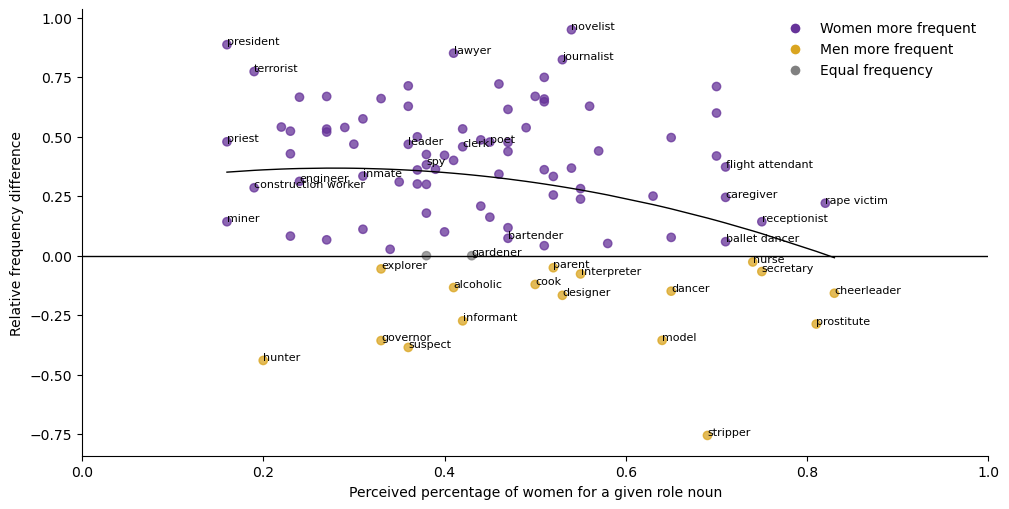

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
col = np.where(np.array(freq_diffs_1) > 0, 'rebeccapurple', np.where(np.array(freq_diffs_1) < 0, 'goldenrod', 'gray'))
plt.scatter(percent_w_1, freq_diffs_1, c=col, alpha=0.75)

coefficients = np.polyfit(percent_w_1, freq_diffs_1, 2)
poly = np.poly1d(coefficients)
for i, txt in enumerate(labels_1):
    if freq_diffs_1[i] < 0:
        ax.text(percent_w_1[i], freq_diffs_1[i], txt, fontsize=8)
    elif percent_w_1[i] >= 0 and (i % 7 == 0 or freq_diffs_1[i] > 0.8 or percent_w_1[i] > 0.7 or percent_w_1[i] < 0.2):
        ax.text(percent_w_1[i], freq_diffs_1[i], txt, fontsize=8)
ax.add_line(plt.Line2D([0, 1], [0, 0], color='black', linewidth=1))
ax.spines[['right', 'top']].set_visible(False)
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='rebeccapurple', markersize=8, label='Women more frequent'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='goldenrod', markersize=8, label = 'Men more frequent'), 
                     plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=8, label = 'Equal frequency')], loc='upper right', frameon=False)
sorted = np.sort(percent_w_1)
plt.plot(sorted, poly(sorted), color='black', linewidth=1)
plt.margins(x=0)
plt.tight_layout()
plt.ylabel('Relative frequency difference')
plt.xlabel('Perceived percentage of women for a given role noun')
plt.savefig('role_nouns.jpeg', dpi=400)
print('Total role nouns:', len(labels_1))

I don't really see a convincing trend based on the perceived gender imbalances in various roles/careers/etc. The only trend I can see is that women are much more frequently the marked case than men, even sometimes when there are typically more women than men (i.e. nurses). 


I'm  also not 100% convinced by the collected perceived frequencies for women in each role noun, so I'm not sure if they're the best x-axis values. 

### Gendered baseline
I divide the total number of gendered occurrences by the unigram frequency of the role noun in syntactic ngram. 

In [7]:
df_generic = pd.read_csv('../Data/role_nps.csv', sep='\t')
df_generic = df_generic.groupby(['ROLE NOUN'], as_index=False).sum()
df_generic = df_generic[['ROLE NOUN', '2008']]
df_generic.rename(columns={'2008': 'FREQ'}, inplace=True)

df_generic['% W'] = df_generic.apply(lambda _: 0.0, axis=1)

role_nouns = df_generic['ROLE NOUN'].values
with open('role nouns.txt') as f:
    for line in f:
        term, count = line[:-1].split(',')
        term = ' '.join([lemmatizer.lemmatize(w.lower()) for w in term.split()])
        df_generic.loc[df_generic['ROLE NOUN'] == term, '% W'] = float(count)

In [19]:
prop_gendered = []
for noun in role_nouns:
    count = df_generic[df_generic['ROLE NOUN'] == noun]['% W'].values[0]
    term_w = '<W> ' + noun
    term_m = '<M> ' + noun
    freq_w = sum(df_all[df_all['PHRASE'] == term_w]['FREQ'].values)
    freq_m = sum(df_all[df_all['PHRASE'] == term_m]['FREQ'].values)

    freq_noun = sum(df_generic[df_generic['ROLE NOUN'] == noun]['FREQ'].values)

    if freq_w < 5 or freq_m < 5:
        continue
    else:
        percent_gendered =(freq_w + freq_m)/freq_noun
        prop_gendered.append(percent_gendered)

Total role nouns: 98


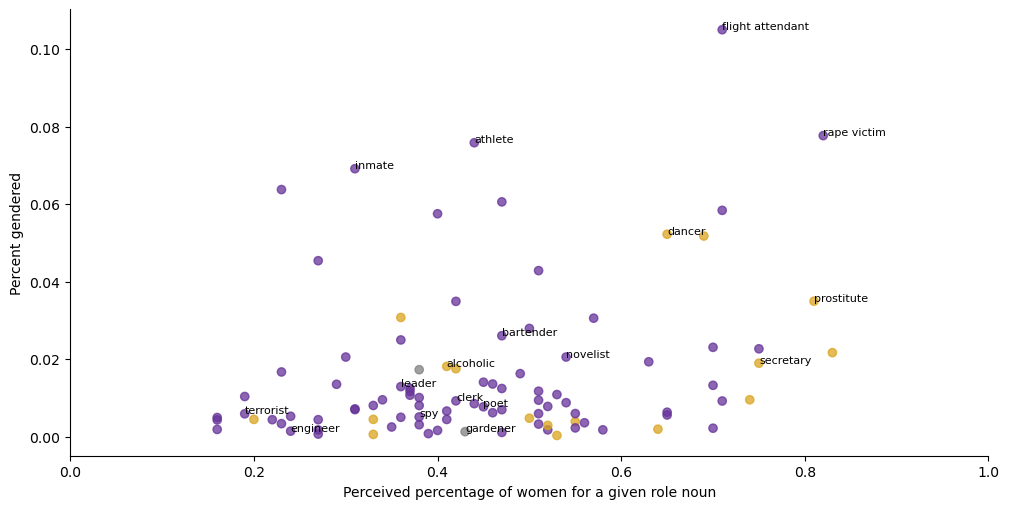

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
col = np.where(np.array(freq_diffs_1) > 0, 'rebeccapurple', np.where(np.array(freq_diffs_1) < 0, 'goldenrod', 'gray'))
plt.scatter(percent_w_1, prop_gendered, c=col, alpha=0.75)
ax.spines[['right', 'top']].set_visible(False)
for i, txt in enumerate(labels_1):
    if i%7 == 0 or prop_gendered[i] > 0.07:
        ax.text(percent_w_1[i], prop_gendered[i], txt, fontsize=8)
plt.xlim(0, 1)
plt.margins(x=0)
plt.tight_layout()
plt.ylabel('Percent gendered')
#plt.yscale('log')
plt.xlabel('Perceived percentage of women for a given role noun')
plt.savefig('role_nouns.jpeg', dpi=400)
print('Total role nouns:', len(labels_1))

Here it is on a log scale to get a zoomed in picture of whats going on with the role nouns with less gendered usages. 

Total role nouns: 98


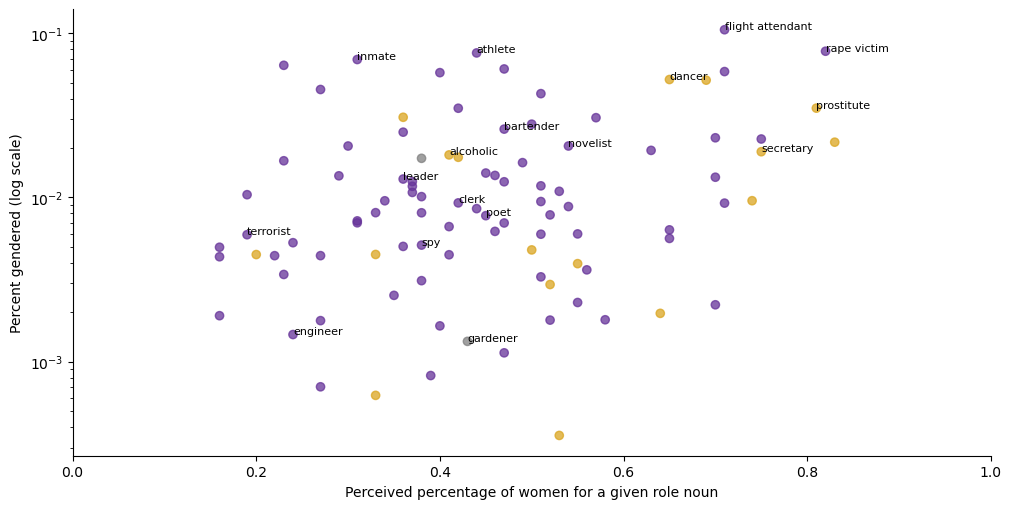

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
col = np.where(np.array(freq_diffs_1) > 0, 'rebeccapurple', np.where(np.array(freq_diffs_1) < 0, 'goldenrod', 'gray'))
plt.scatter(percent_w_1, prop_gendered, c=col, alpha=0.75)
ax.spines[['right', 'top']].set_visible(False)
for i, txt in enumerate(labels_1):
    if i%7 == 0 or prop_gendered[i] > 0.07:
        ax.text(percent_w_1[i], prop_gendered[i], txt, fontsize=8)
plt.xlim(0, 1)
plt.margins(x=0)
plt.tight_layout()
plt.ylabel('Percent gendered (log scale)')
plt.yscale('log')
plt.xlabel('Perceived percentage of women for a given role noun')
plt.savefig('role_nouns.jpeg', dpi=400)
print('Total role nouns:', len(labels_1))

There is a slight upward trend such that as the perceived percentage of women in a given career gets higher, the percentage of gendered usages for a role noun also increases. I will have to think more about what this means for the previous frequency plot. 

## Principle 1 & 2
### First attempt: 
Grouping based on stereotypical adjective for women, stereotypical adjectives for men, and adjectives without a stereotype

Using tables generated by [Bailey et al. (2022)](https://www.science.org/doi/10.1126/sciadv.abm2463), I get a set of adjectives that 3 annotators agreed were stereotypical of men, a set that are agreed to be stereotypical of women, and a somewhat smaller set that all 3 annotators agreed where stereotypical of neither. The data is specifically from their OSF repository: https://www.science.org/doi/10.1126/sciadv.abm2463

#### UPDATE:
I've added role nouns to the plot

In [12]:
df_adjectives_1 = pd.read_csv('Study2A_designations_1of2.csv') 
df_adjectives_2 = pd.read_csv('Study2A_designations_2of2.csv')

male_stereotyped = [col for col in df_adjectives_1.columns if (df_adjectives_1[col] == 1).all()] + [col for col in df_adjectives_2.columns if (df_adjectives_2[col] == 1).all()]
female_stereotyped = [col for col in df_adjectives_1.columns if (df_adjectives_1[col] == 3).all()] + [col for col in df_adjectives_2.columns if (df_adjectives_2[col] == 3).all()]
neutral = [col for col in df_adjectives_1.columns if (df_adjectives_1[col] == 2).all()] + [col for col in df_adjectives_2.columns if (df_adjectives_2[col] == 2).all()]

print(f'M ADJ: {len(male_stereotyped)}, W ADJ:{len(female_stereotyped)}, N ADJ:{len(neutral)}')

M ADJ: 75, W ADJ:78, N ADJ:11


In [13]:
import re
with open('people centric adjs.txt') as f:
    identity_based = f.readlines()
identity_based = [re.sub(r'<.>\s*\n*', '', adj) for adj in identity_based]

In [14]:
adj_m = []
adj_w = []
adj_n = []
adj_i = []
labels_m, labels_w, labels_n, labels_i = [], [], [], []
for adj in male_stereotyped + female_stereotyped + neutral + identity_based:
    term_m = lemmatizer.lemmatize(adj) + '<M>'
    term_w = lemmatizer.lemmatize(adj) + '<W>'
    label = lemmatizer.lemmatize(adj)
    freq_w = sum(df_all[df_all['PHRASE'] == term_w]['FREQ'].values)
    freq_m = sum(df_all[df_all['PHRASE'] == term_m]['FREQ'].values)
    if freq_w < 5 or freq_m < 5:
        continue
    else:
        diff = freq_w - freq_m
        if diff == 0:
            norm_diff = 0
        else:
            norm_diff = diff/(freq_m+freq_w)

        if adj in male_stereotyped:
            adj_m.append(norm_diff)
            labels_m.append(label)
        elif adj in neutral:
            adj_n.append(norm_diff)
            labels_n.append(label)
        elif adj in female_stereotyped:
            adj_w.append(norm_diff)
            labels_w.append(label)
        elif adj in identity_based:
            adj_i.append(norm_diff)
            labels_i.append(label)

print(len(adj_m),  len(adj_n), len(adj_w), len(adj_i), len(freq_diffs_1))

44 6 44 47 98


In [15]:
data = [adj_m, adj_n, adj_w, adj_i, freq_diffs_1]
labels = [labels_m, labels_n, labels_w, labels_i, labels_1]

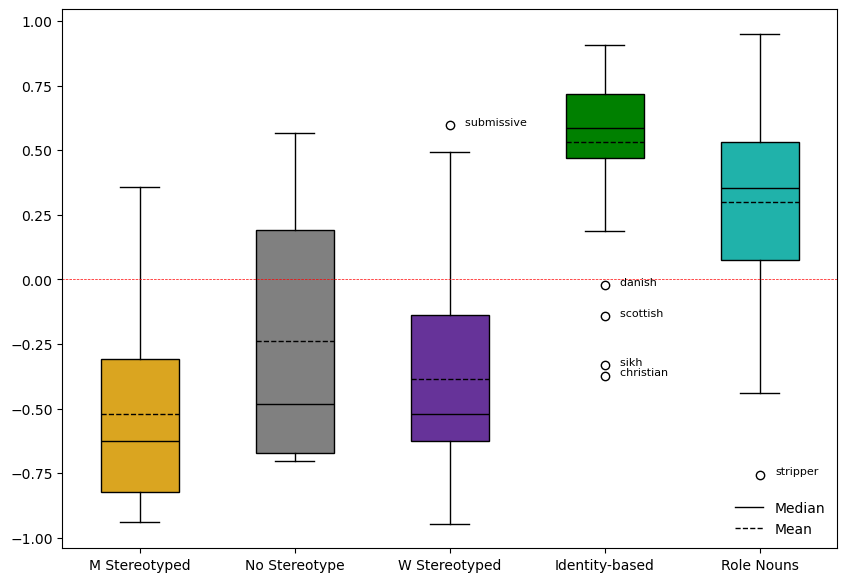

Greater than 0 means adjectives that co-occur with terms for women are more frequent than those that co-occur with terms for men.


In [16]:
fig, ax = plt.subplots(1, 1, figsize =(10, 7))

# Creating plot
bp = ax.boxplot(data, patch_artist = True, showmeans=True, meanline=True, meanprops={'color':'black', 'linewidth':1})
plt.xticks([1, 2, 3, 4, 5], ['M Stereotyped', 'No Stereotype', 'W Stereotyped', 'Identity-based', 'Role Nouns'])
colors = ['goldenrod',  'gray', 'rebeccapurple', 'green', 'lightseagreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 1)
ax.add_line(plt.Line2D([0, 6], [0, 0], color='red', linewidth=.5, linestyle='--'))
# want a legend that shows the straight line is median and dashed is mean
plt.legend(handles=[plt.Line2D([0], [0], color='black', linewidth=1, label='Median'), plt.Line2D([0], [0], color='black', linewidth=1, linestyle='--', label='Mean')], loc='lower right', frameon=False)

for i in range(len(bp['fliers'])):
    outliers = bp['fliers'][i].get_ydata()
    for pt in outliers:
        idx = data[i].index(pt)
        label = labels[i][idx]
        ax.annotate(f'{label}', (i+1.1, pt), fontsize=8)


# show plot
plt.show()
print('Greater than 0 means adjectives that co-occur with terms for women are more frequent than those that co-occur with terms for men.')

In [17]:
from scipy.stats import kruskal
import scikit_posthocs as sp

# Perform the Kruskal-Wallis H-test
stat, p_value = kruskal(adj_m, adj_n, adj_w, adj_i, freq_diffs_1)

print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis test statistic: 135.15332713856304
P-value: 3.076126975470109e-28


In [18]:
posthoc_results_h = sp.posthoc_dunn(data, p_adjust='holm')
posthoc_results_B = sp.posthoc_dunn(data, p_adjust='bonferroni')
print('Post-hoc results (holm):')
print(posthoc_results_h)
print('\nPost-hoc results (boneferroni)')
print(posthoc_results_B)

Post-hoc results (holm):
              1         2             3             4             5
1  1.000000e+00  0.690409  6.904092e-01  3.212486e-20  2.628902e-14
2  6.904092e-01  1.000000  6.904092e-01  4.499057e-03  1.236422e-01
3  6.904092e-01  0.690409  1.000000e+00  4.616086e-16  2.188492e-10
4  3.212486e-20  0.004499  4.616086e-16  1.000000e+00  9.037015e-03
5  2.628902e-14  0.123642  2.188492e-10  9.037015e-03  1.000000e+00

Post-hoc results (boneferroni)
              1         2             3             4             5
1  1.000000e+00  1.000000  1.000000e+00  3.212486e-20  3.286127e-14
2  1.000000e+00  1.000000  1.000000e+00  7.498428e-03  3.091055e-01
3  1.000000e+00  1.000000  1.000000e+00  5.128984e-16  3.126417e-10
4  3.212486e-20  0.007498  5.128984e-16  1.000000e+00  1.807403e-02
5  3.286127e-14  0.309106  3.126417e-10  1.807403e-02  1.000000e+00


All adjective (on average) co-occur more frequently with terms for men than with terms for women. This does make some sense to me as the April Bailey paper did suggest that adjectives describing people tends to be more similar to words for men than words for women (which suggests they occur in more similar context and perhaps makes them more likely to co-occur)

There is a statistically significant difference between the mean difference in frequency of terms for men versus terms for women. The identity based adjectives are very strongly associated with women and even co-occur more frequently with terms for women than role nouns.
